#  Employee Attrition & Retention Analysis

 ## 1. Attrition (Employee Churn / Resignation Risk)

      Which employees are more likely to resign?

      What are the major factors influencing attrition? (e.g., Age, DistanceFromHome, JobSatisfaction, OverTime, MonthlyIncome)

      What are the attrition trends across different Departments and Job Roles?

## 2. Performance & Productivity Analysis

    What is the relationship between Performance Rating and Monthly Income?

    Do employees with higher Training Times Last Year perform better?

    How do Job Involvement, Job Satisfaction, and Work-Life Balance impact employee performance?

## 3. Salary & Compensation Insights

    Does salary (MonthlyIncome, HourlyRate, DailyRate) impact attrition?

    What is the relationship between Percent Salary Hike and Attrition?

    Is there any imbalance in salary distribution across different Job Roles and Job Levels?

## 4. Work-Life Balance & OverTime

    What is the attrition rate among employees who work overtime?

    How do Work-Life Balance and YearsWithCurrentManager impact employee satisfaction?

## 5. Career Growth & Promotions

    What is the relationship between YearsSinceLastPromotion and Attrition?

    What is the relationship between YearsInCurrentRole and Job Satisfaction?

    After how many years do employees typically expect a promotion, and do they resign if it is delayed?

 # Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [4]:
df = pd.read_csv("employee_attrition_train.csv")

# Check first 5 rows

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


# check last 5 rows

In [6]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1024,NaN,No,Travel_Rarely,750.0,Research & Development,28.0,3,Life Sciences,1,1596,...,4,80,2,10,3,2,10,9,6,8
1025,41.0,No,Travel_Rarely,447.0,Research & Development,NaN,3,Life Sciences,1,1814,...,1,80,0,11,3,1,3,2,1,2
1026,22.0,Yes,Travel_Frequently,1256.0,Research & Development,NaN,4,Life Sciences,1,1203,...,2,80,1,1,5,3,0,0,0,0
1027,29.0,No,Travel_Rarely,1378.0,Research & Development,13.0,2,Other,1,2053,...,1,80,1,10,2,3,4,3,0,3
1028,50.0,No,Travel_Rarely,264.0,Sales,9.0,3,Marketing,1,1591,...,3,80,1,27,2,3,1,0,0,0


# check column and rows number

In [7]:
df.shape

(1029, 35)

# Save Data into SQLite Database

In [8]:
# Create a SQLite database connection
conn = sqlite3.connect("employee_attrition.db")
#  dataframe to SQL table
df.to_sql("employee_detail", conn, if_exists="replace", index=False)

# Verify by running a SQL query
query = "SELECT * FROM employee_detail LIMIT 5;"
print(pd.read_sql(query, conn))

    Age Attrition     BusinessTravel  DailyRate              Department  \
0  50.0        No      Travel_Rarely     1126.0  Research & Development   
1  36.0        No      Travel_Rarely      216.0  Research & Development   
2  21.0       Yes      Travel_Rarely      337.0                   Sales   
3  50.0        No  Travel_Frequently     1246.0         Human Resources   
4  52.0        No      Travel_Rarely      994.0  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0               1.0          2        Medical              1             997   
1               6.0          2        Medical              1             178   
2               7.0          1      Marketing              1            1780   
3               NaN          3        Medical              1             644   
4               7.0          4  Life Sciences              1            1118   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \


# Dataset information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

# Dataset Columns

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Check null counts

In [11]:
df.isnull().sum()

Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

# Start Data Cleaning

## Change datatype of Columns

In [12]:

# Categorical columns list
categorical_cols = [
    'Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime',
    'JobLevel', 'PerformanceRating', 'StockOptionLevel'
]

# Datatype change
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       893 non-null    float64 
 1   Attrition                 1029 non-null   category
 2   BusinessTravel            1024 non-null   category
 3   DailyRate                 1002 non-null   float64 
 4   Department                1029 non-null   category
 5   DistanceFromHome          934 non-null    float64 
 6   Education                 1029 non-null   category
 7   EducationField            1029 non-null   category
 8   EmployeeCount             1029 non-null   int64   
 9   EmployeeNumber            1029 non-null   int64   
 10  EnvironmentSatisfaction   1029 non-null   int64   
 11  Gender                    1029 non-null   category
 12  HourlyRate                1029 non-null   int64   
 13  JobInvolvement            1029 non-null   int64 

# statistics summary numerical + categorical

In [14]:
df.describe(include='all')


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,893.000000,1029,1024,1002.000000,1029,934.000000,1029.0,1029,1029.0,1029.000000,...,1029.000000,1029.0,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
unique,NaN,2,3,NaN,3,NaN,5.0,6,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,3.0,Life Sciences,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,853,723,NaN,676,NaN,386.0,426,NaN,NaN,...,NaN,NaN,432.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,37.930571,NaN,NaN,800.528942,NaN,9.930407,NaN,NaN,1.0,1024.367347,...,2.689990,80.0,NaN,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831
std,9.395978,NaN,NaN,408.109828,NaN,8.421791,NaN,NaN,0.0,606.301635,...,1.077767,0.0,NaN,7.857581,1.283401,0.697278,6.068322,3.658595,3.108651,3.522574
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,NaN,NaN,1.0,1.000000,...,1.000000,80.0,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,NaN,NaN,458.250000,NaN,2.000000,NaN,NaN,1.0,496.000000,...,2.000000,80.0,NaN,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,NaN,NaN,801.500000,NaN,8.000000,NaN,NaN,1.0,1019.000000,...,3.000000,80.0,NaN,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,NaN,NaN,1162.000000,NaN,16.000000,NaN,NaN,1.0,1553.000000,...,4.000000,80.0,NaN,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000


# Fill Missing Values

In [15]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['DailyRate'].fillna(df['DailyRate'].median(), inplace=True)
df['DistanceFromHome'].fillna(df['DistanceFromHome'].mean(), inplace=True)


In [16]:
# Fill missing values with mode
df['BusinessTravel'].fillna(df['BusinessTravel'].mode()[0], inplace=True)
df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0], inplace=True)


In [17]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [18]:
#  Check total duplicates (completely same row)
print(df.duplicated().sum())

0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1029 non-null   float64 
 1   Attrition                 1029 non-null   category
 2   BusinessTravel            1029 non-null   category
 3   DailyRate                 1029 non-null   float64 
 4   Department                1029 non-null   category
 5   DistanceFromHome          1029 non-null   float64 
 6   Education                 1029 non-null   category
 7   EducationField            1029 non-null   category
 8   EmployeeCount             1029 non-null   int64   
 9   EmployeeNumber            1029 non-null   int64   
 10  EnvironmentSatisfaction   1029 non-null   int64   
 11  Gender                    1029 non-null   category
 12  HourlyRate                1029 non-null   int64   
 13  JobInvolvement            1029 non-null   int64 

# Detect Outlire

In [20]:
df.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1029.000000,1029.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,...,1029.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,37.807580,800.554422,9.930407,1.0,1024.367347,2.683188,66.680272,2.713314,2.712342,6449.796890,...,15.260447,2.689990,80.0,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831
std,8.758092,402.714779,8.023220,0.0,606.301635,1.096829,20.474094,0.710146,1.096889,4794.525367,...,3.665779,1.077767,0.0,7.857581,1.283401,0.697278,6.068322,3.658595,3.108651,3.522574
min,18.000000,102.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1009.000000,...,11.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,466.000000,2.000000,1.0,496.000000,2.000000,48.000000,2.000000,2.000000,2814.000000,...,12.000000,2.000000,80.0,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,801.500000,9.000000,1.0,1019.000000,3.000000,67.000000,3.000000,3.000000,4735.000000,...,14.000000,3.000000,80.0,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1153.000000,14.000000,1.0,1553.000000,4.000000,84.000000,3.000000,4.000000,8446.000000,...,18.000000,4.000000,80.0,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,1.0,2068.000000,4.000000,100.000000,4.000000,4.000000,19999.000000,...,25.000000,4.000000,80.0,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


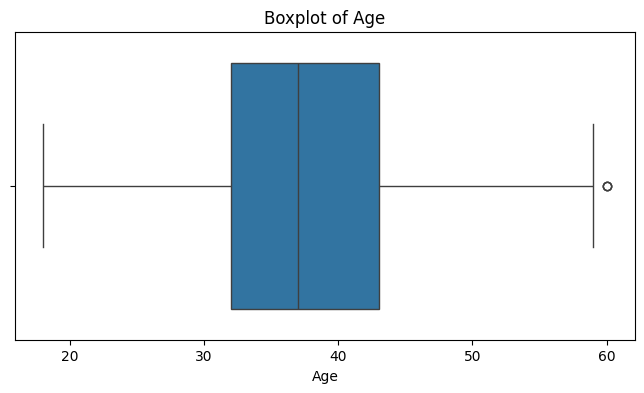

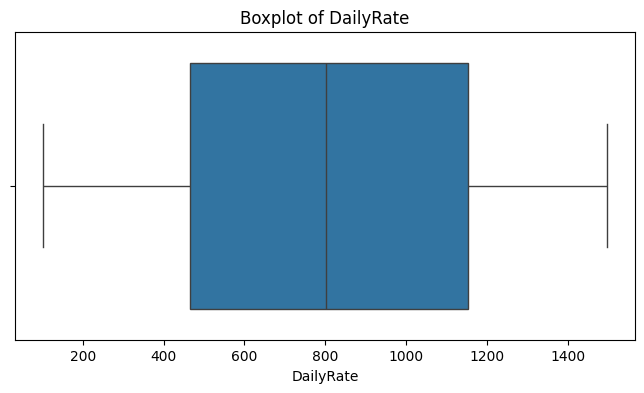

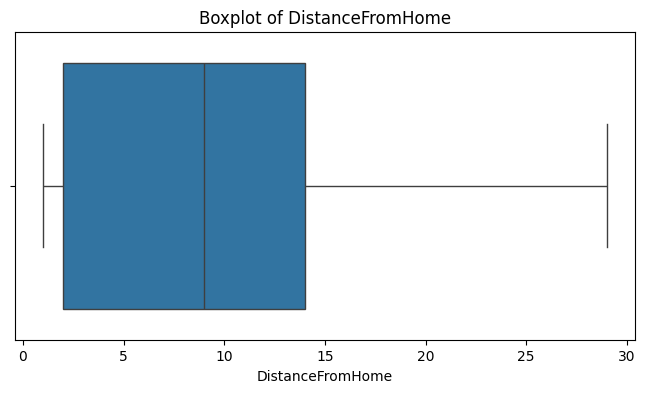

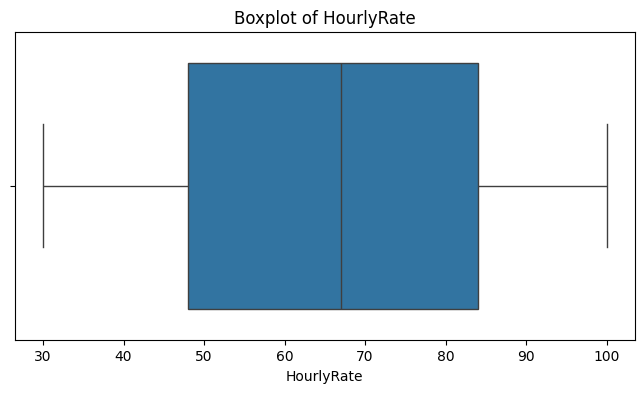

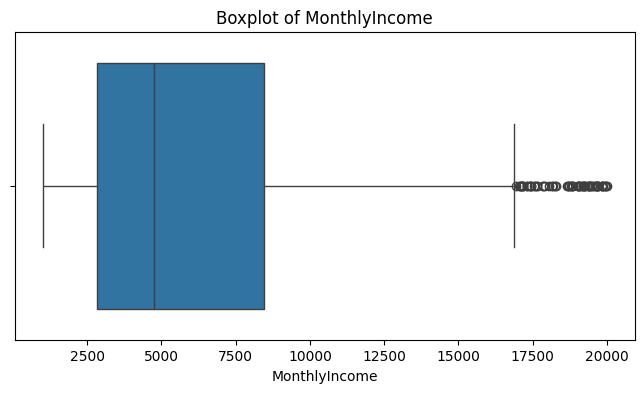

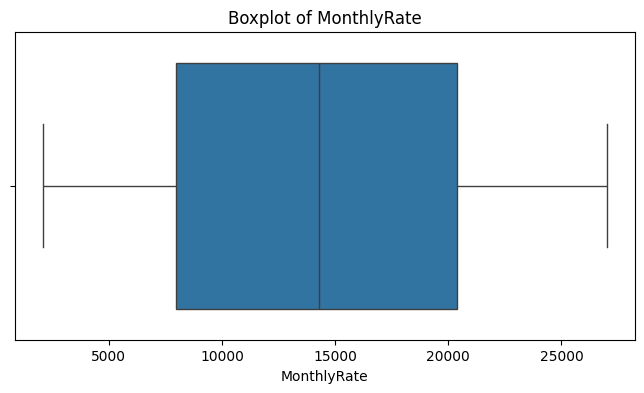

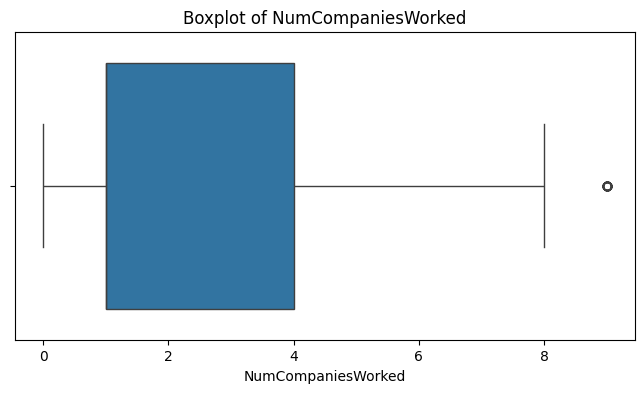

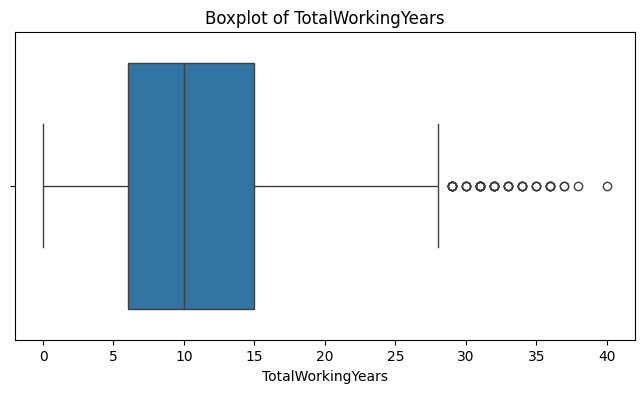

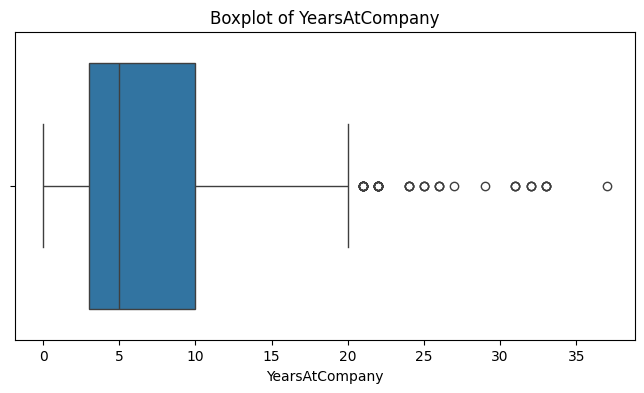

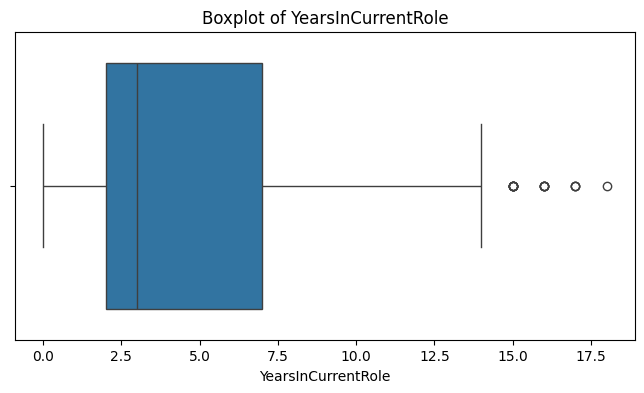

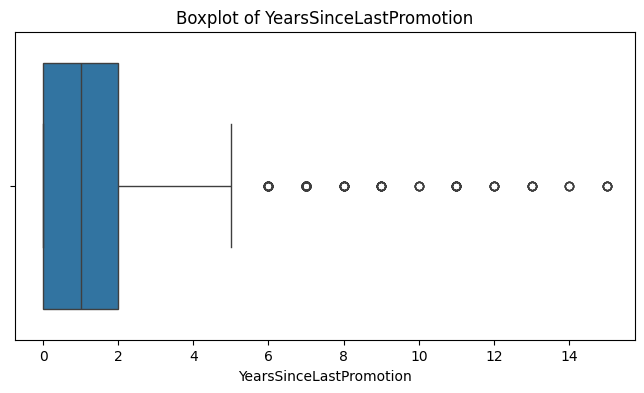

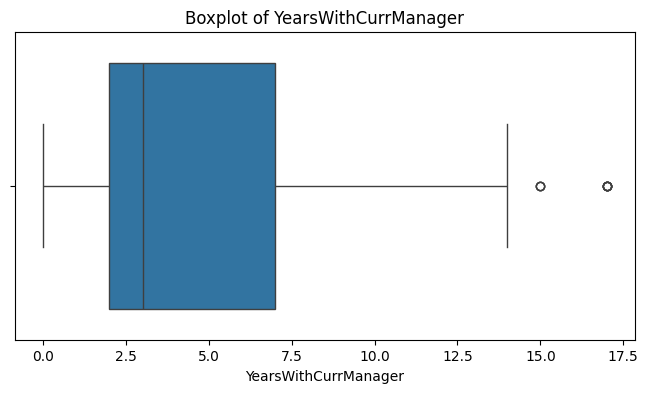

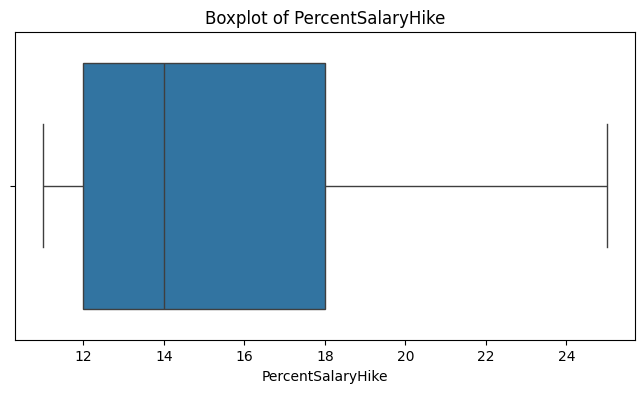

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns for outlier check
num_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'PercentSalaryHike'
]

# Loop through each column and plot boxplot
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


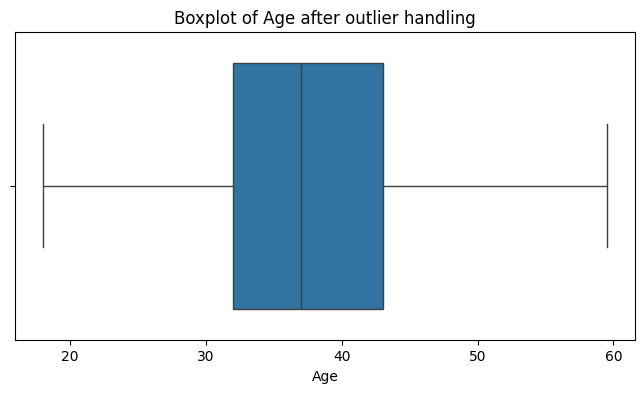

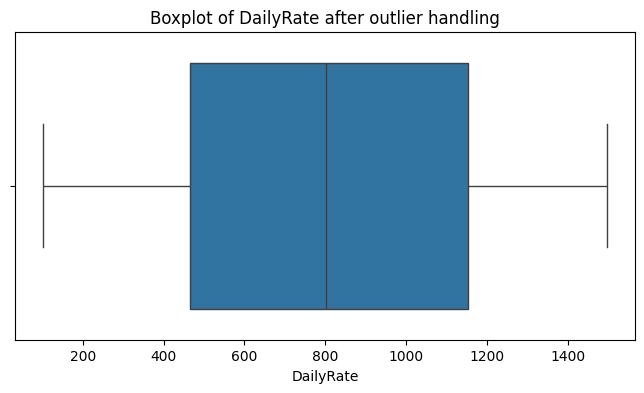

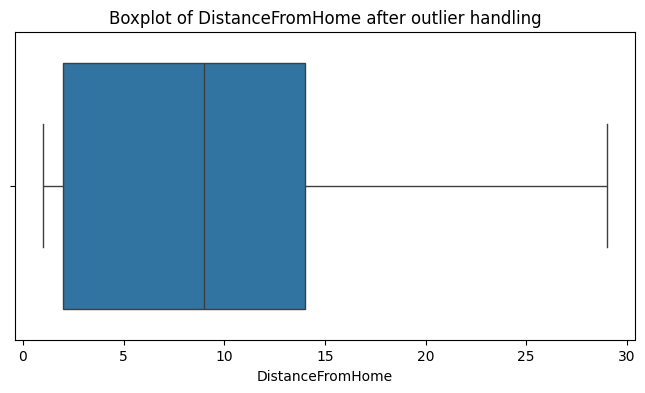

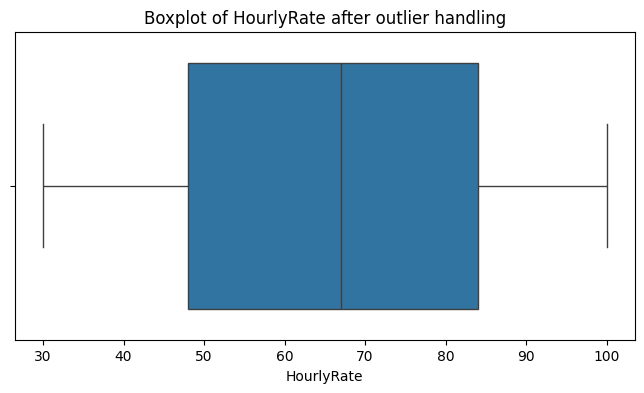

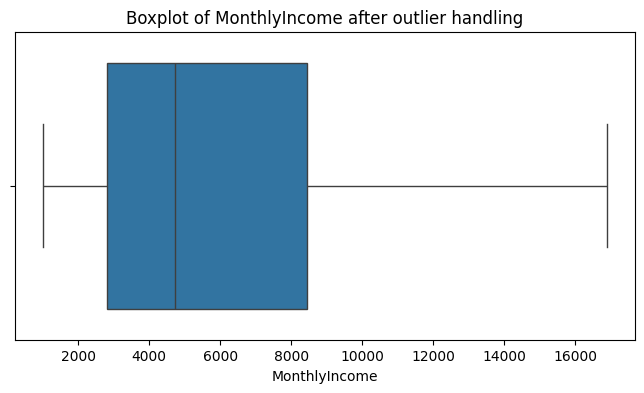

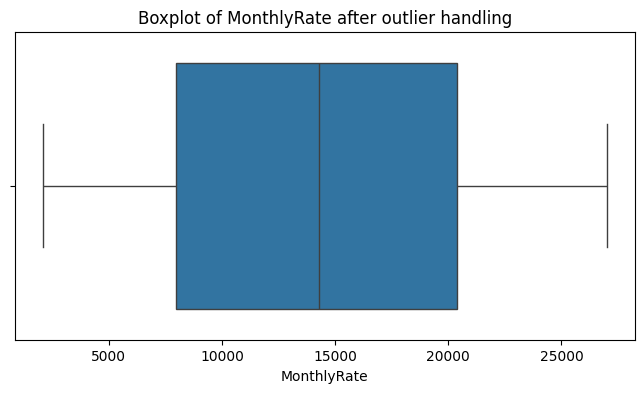

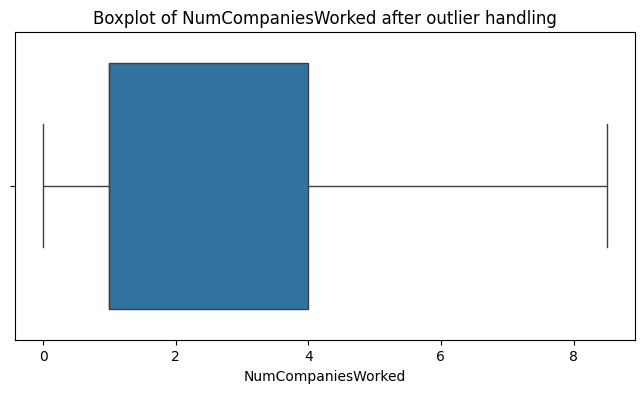

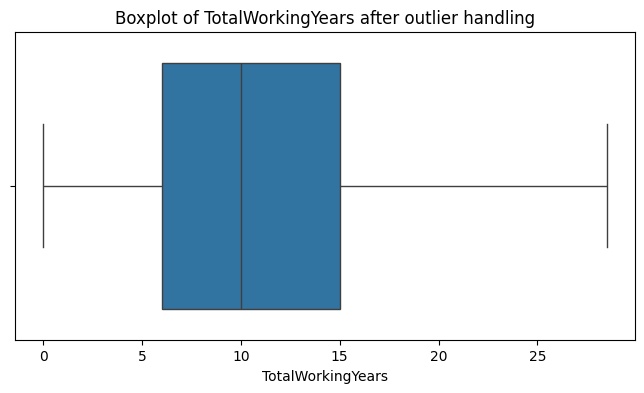

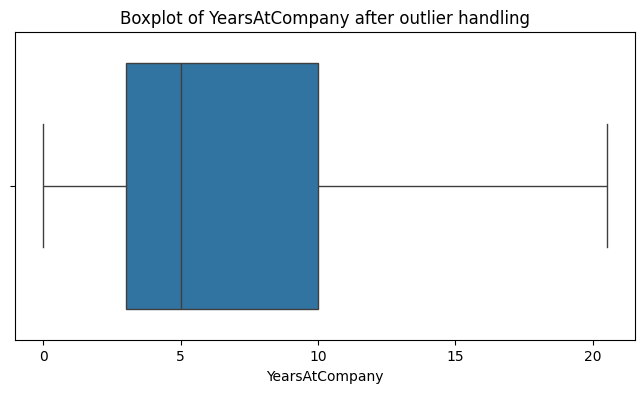

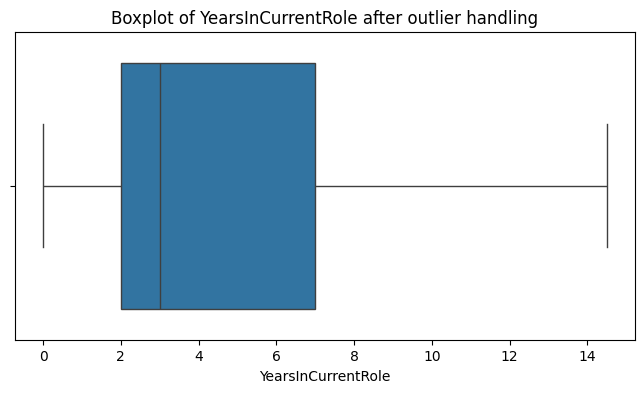

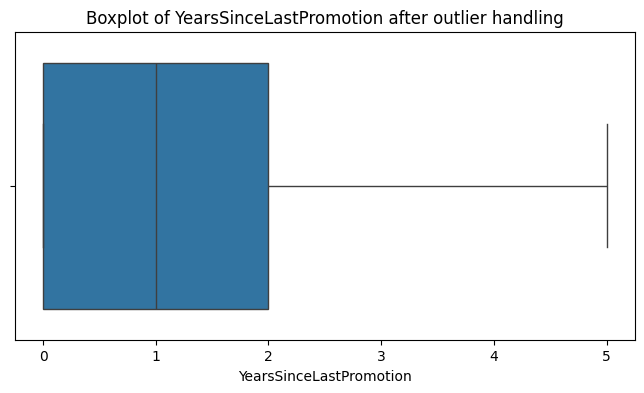

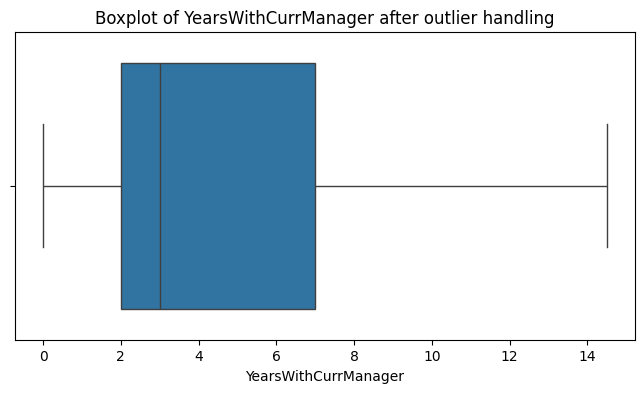

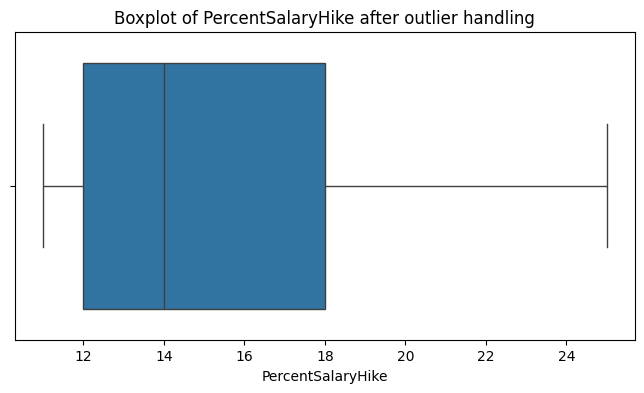

In [22]:
# Remove Outlire 
# List of numerical columns
num_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'PercentSalaryHike'
]

# Handle outliers using IQR capping
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df[col] = df[col].apply(lambda x: upper if x > upper else lower if x < lower else x)

# Check boxplot again for any remaining outliers
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} after outlier handling')
    plt.show()


# Feature Engineering based on Questions¶

# 1. Attrition (Employee Churn / Resignation Risk)

    Which employees are more likely to resign?

    What are the major factors influencing attrition? (e.g., Age, DistanceFromHome,JobSatisfaction, OverTime, MonthlyIncome)

    What are the attrition trends across different Departments and Job Roles?

In [23]:
# Convert Attrition to binary (Yes=1, No=0)
df['Attrition_Flag'] = df['Attrition'].map({'Yes':1, 'No':0})

# Age groups (young, mid, senior)
df['Age_Group'] = pd.cut(df['Age'], bins=[18,30,40,50,60], 
                         labels=['Young','Mid','Senior','Near_Retire'])

# Distance category
df['Distance_Category'] = pd.cut(df['DistanceFromHome'], bins=[0,5,15,30],
                                 labels=['Near','Moderate','Far'])

# Overtime flag (Yes=1, No=0)
df['OverTime_Flag'] = df['OverTime'].map({'Yes':1,'No':0})


## 2. Performance & Productivity Analysis

    What is the relationship between Performance Rating and Monthly Income?

    Do employees with higher Training Times Last Year perform better?

    How do Job Involvement, Job Satisfaction, and Work-Life Balance impact employee performance?

In [24]:
# Performance high/low group
df['Performance_Level'] = df['PerformanceRating'].apply(lambda x: 'High' if x>=3 else 'Low')

# Training intensity
df['Training_Category'] = pd.cut(df['TrainingTimesLastYear'], bins=[0,2,5,10], 
                                 labels=['Low','Medium','High'])

# Work involvement category
df['JobInvolvement_Level'] = df['JobInvolvement'].map({1:'Low',2:'Medium',3:'High',4:'Very High'})


## 3. Salary & Compensation Insights

    Does salary (MonthlyIncome, HourlyRate, DailyRate) impact attrition?

    What is the relationship between Percent Salary Hike and Attrition?

    Is there any imbalance in salary distribution across different Job Roles and Job Levels?


In [25]:
# Salary range groups
df['MonthlyIncome_Band'] = pd.qcut(df['MonthlyIncome'], q=4, 
                                   labels=['Low','Medium','High','Very High'])

# Check salary difference by job role
df['Income_per_YearExperience'] = df['MonthlyIncome'] / (df['TotalWorkingYears']+1)

# Compensation per hour (for fairness check)
df['DailyIncome'] = df['DailyRate']
df['HourlyIncome'] = df['HourlyRate']

## 4. Work-Life Balance & OverTime

    What is the attrition rate among employees who work overtime?

    How do Work-Life Balance and YearsWithCurrentManager impact employee satisfaction?




In [26]:
# Ensure binary flags are int
df['OverTime_Flag'] = df['OverTime_Flag'].astype(int)
df['Attrition_Flag'] = df['Attrition_Flag'].astype(int)

# Now multiplication will work
df['OverTime_Risk'] = df['OverTime_Flag'] * df['Attrition_Flag']


## 5. Career Growth & Promotions

    What is the relationship between YearsSinceLastPromotion and Attrition?

    What is the relationship between YearsInCurrentRole and Job Satisfaction?

    After how many years do employees typically expect a promotion, and do they resign if it is delayed?

In [27]:
# Years since promotion group
df['Promotion_Delay'] = pd.cut(df['YearsSinceLastPromotion'], 
                               bins=[0,2,5,10,20], 
                               labels=['Fast','Moderate','Slow','Very Slow'])

# Years in role satisfaction ratio
df['Role_Stability'] = df['YearsInCurrentRole'] / (df['TotalWorkingYears']+1)

# Promotion wait flag
df['Promotion_Wait_Flag'] = (df['YearsSinceLastPromotion'] > 5).astype(int)


In [28]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_Flag', 'Age_Group',
       'Distance_Category', 'OverTime_Flag', 'Performance_Level',
       'Training_Category', 'JobInvolvement_Level', 'MonthlyIncome_Band',
       'Income_per_YearExperience', 'DailyIncome', 'HourlyIncome',
       'OverTime_Risk', 'Promotion_Delay', 'Role_Stability',
       'Promo

## Q1: Which employees are more likely to resign?

In [29]:
df_attrition = pd.read_sql_query("""
SELECT Department, JobRole, 
       COUNT(*) AS TotalEmployees,
       SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS Resigned,
       ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) * 1.0 / COUNT(*),2) AS AttritionRate
FROM employee_detail
GROUP BY Department, JobRole
ORDER BY AttritionRate DESC;
""", conn)



In [30]:
df_perf = pd.read_sql_query("""
SELECT PerformanceRating, 
       ROUND(AVG(MonthlyIncome),2) AS AvgIncome,
       COUNT(*) AS EmployeeCount
FROM employee_detail
GROUP BY PerformanceRating
ORDER BY PerformanceRating;
""", conn)


In [31]:
df_salary = pd.read_sql_query("""
SELECT 
    CASE 
        WHEN MonthlyIncome < 3000 THEN 'Low'
        WHEN MonthlyIncome BETWEEN 3000 AND 6000 THEN 'Medium'
        WHEN MonthlyIncome BETWEEN 6000 AND 12000 THEN 'High'
        ELSE 'Very High' 
    END AS SalaryBand,
    COUNT(*) AS TotalEmployees,
    SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS Resigned,
    ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) * 1.0 / COUNT(*),2) AS AttritionRate
FROM employee_detail
GROUP BY SalaryBand
ORDER BY AttritionRate DESC;
""", conn)


In [32]:
df_overtime = pd.read_sql_query("""
SELECT OverTime, 
       COUNT(*) AS TotalEmployees,
       SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS Resigned,
       ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) * 1.0 / COUNT(*),2) AS AttritionRate
FROM employee_detail
GROUP BY OverTime;
""", conn)


In [33]:
df_promotion = pd.read_sql_query("""
SELECT YearsSinceLastPromotion, 
       COUNT(*) AS TotalEmployees,
       SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS Resigned,
       ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) * 1.0 / COUNT(*),2) AS AttritionRate
FROM employee_detail
GROUP BY YearsSinceLastPromotion
ORDER BY YearsSinceLastPromotion;
""", conn)


In [34]:
print(df_attrition)

                Department                    JobRole  TotalEmployees  \
0                    Sales       Sales Representative              66   
1   Research & Development      Laboratory Technician             179   
2          Human Resources            Human Resources              34   
3   Research & Development         Research Scientist             214   
4                    Sales            Sales Executive             217   
5   Research & Development     Manufacturing Director              95   
6                    Sales                    Manager              28   
7   Research & Development                    Manager              37   
8   Research & Development  Healthcare Representative              89   
9   Research & Development          Research Director              62   
10         Human Resources                    Manager               8   

    Resigned  AttritionRate  
0         28          42.42  
1         44          24.58  
2          8          23.53  
3  

In [35]:
print(df_perf)

   PerformanceRating  AvgIncome  EmployeeCount
0                  3    6470.83            865
1                  4    6338.84            164


In [36]:
print(df_salary)

  SalaryBand  TotalEmployees  Resigned  AttritionRate
0        Low             302        92          30.46
1       High             234        31          13.25
2     Medium             351        45          12.82
3  Very High             142         8           5.63


In [37]:
print(df_overtime)

  OverTime  TotalEmployees  Resigned  AttritionRate
0       No             731        77          10.53
1      Yes             298        99          33.22


In [38]:
print(df_promotion)

    YearsSinceLastPromotion  TotalEmployees  Resigned  AttritionRate
0                         0             415        86          20.72
1                         1             245        35          14.29
2                         2             115        20          17.39
3                         3              33         5          15.15
4                         4              41         3           7.32
5                         5              31         1           3.23
6                         6              25         6          24.00
7                         7              52        14          26.92
8                         8              16         0           0.00
9                         9              11         1           9.09
10                       10               5         1          20.00
11                       11              16         1           6.25
12                       12               7         0           0.00
13                       13       

# Visualization

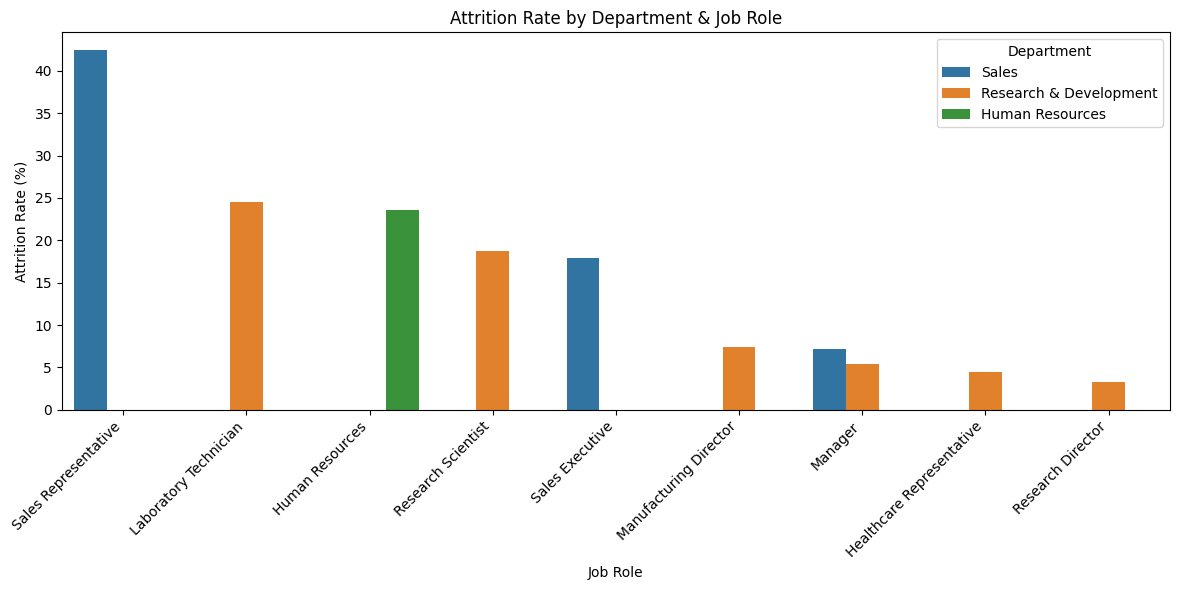

In [39]:
# Plot AttritionRate by JobRole
plt.figure(figsize=(12,6))
sns.barplot(x='JobRole', y='AttritionRate', hue='Department', data=df_attrition)
plt.xticks(rotation=45, ha='right')
plt.title("Attrition Rate by Department & Job Role")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Job Role")
plt.legend(title='Department')
plt.tight_layout()
plt.show()

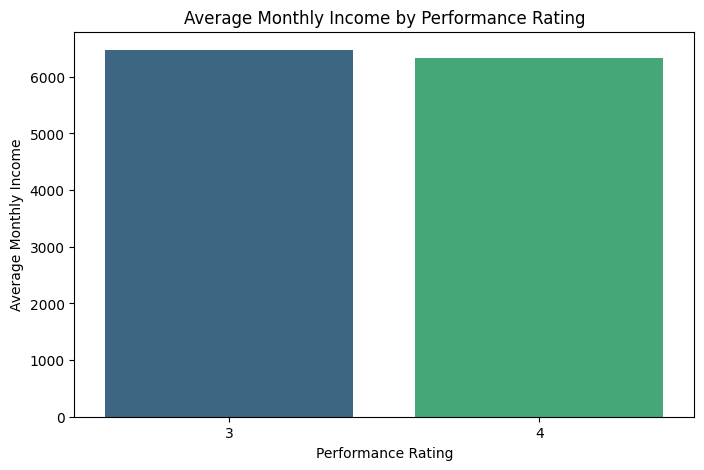

In [40]:
# Plot AvgIncome vs PerformanceRating
plt.figure(figsize=(8,5))
sns.barplot(x='PerformanceRating', y='AvgIncome', data=df_perf, palette='viridis')
plt.title("Average Monthly Income by Performance Rating")
plt.ylabel("Average Monthly Income")
plt.xlabel("Performance Rating")
plt.show()


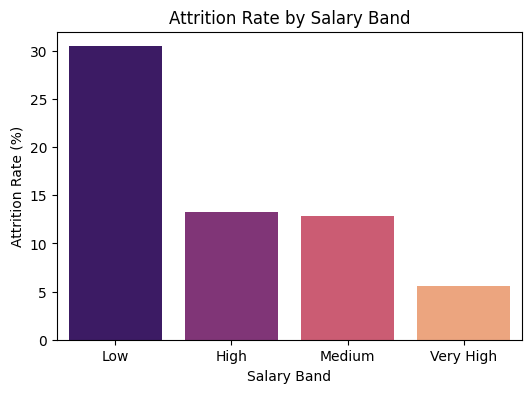

In [41]:
# Plot AttritionRate by SalaryBand
plt.figure(figsize=(6,4))
sns.barplot(x='SalaryBand', y='AttritionRate', data=df_salary, palette='magma')
plt.title("Attrition Rate by Salary Band")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Salary Band")
plt.show()

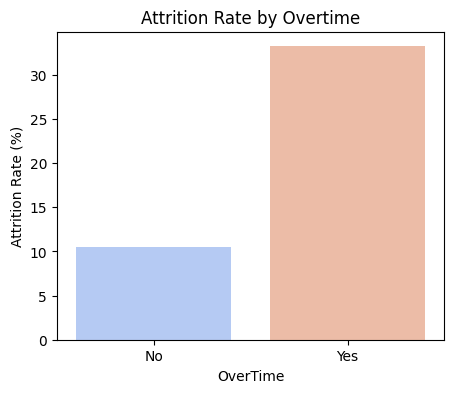

In [42]:
# Plot AttritionRate by OverTime
plt.figure(figsize=(5,4))
sns.barplot(x='OverTime', y='AttritionRate', data=df_overtime, palette='coolwarm')
plt.title("Attrition Rate by Overtime")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("OverTime")
plt.show()


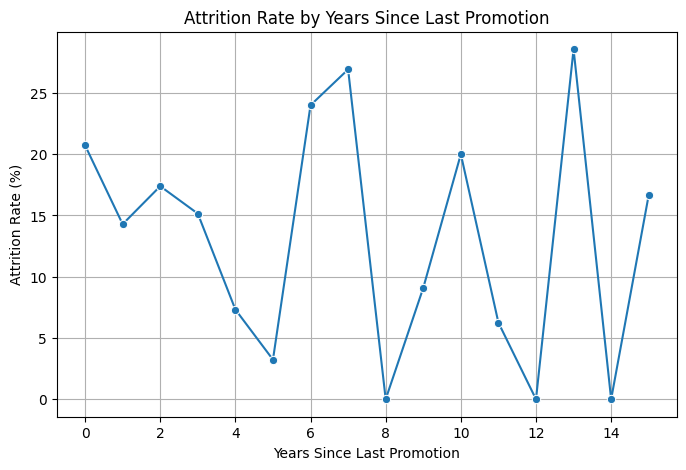

In [43]:
# Plot AttritionRate vs YearsSinceLastPromotion
plt.figure(figsize=(8,5))
sns.lineplot(x='YearsSinceLastPromotion', y='AttritionRate', data=df_promotion, marker='o')
plt.title("Attrition Rate by Years Since Last Promotion")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Years Since Last Promotion")
plt.grid(True)
plt.show()


In [44]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_Flag', 'Age_Group',
       'Distance_Category', 'OverTime_Flag', 'Performance_Level',
       'Training_Category', 'JobInvolvement_Level', 'MonthlyIncome_Band',
       'Income_per_YearExperience', 'DailyIncome', 'HourlyIncome',
       'OverTime_Risk', 'Promotion_Delay', 'Role_Stability',
       'Promo

In [45]:
df.to_csv("final_result.csv", index=False)